[link text](https://)# Exploring LLM Dataset Creation and Evaluation

## Install the required libraries

In [3]:
!pip install -qqq huggingface-hub argilla "distilabel[huggingface]" accelerate openai datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 697.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.2/442.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from datasets import load_dataset
import argilla as rg
from google.colab import userdata

# Authenticate with Argilla
dataset = load_dataset("DIBT/10k_prompts_ranked")
column_names = dataset["train"].column_names
print(column_names)

/usr/local/lib/python3.10/dist-packages/argilla/_api/_token.py:83: UserWarning: 
The secrets ARGILLA_API_URL and does not exist in your Colab secrets.
  warnings.warn(f"\nThe secrets {name} and does not exist in your Colab secrets.")
/usr/local/lib/python3.10/dist-packages/argilla/_api/_token.py:83: UserWarning: 
The secrets ARGILLA_API_KEY and does not exist in your Colab secrets.
  warnings.warn(f"\nThe secrets {name} and does not exist in your Colab secrets.")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10331 [00:00<?, ? examples/s]

['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic']


In [5]:
dataset['train'][0]

{'prompt': 'Provide step-by-step instructions on how to make a safe and effective homemade all-purpose cleaner from common household ingredients. The guide should include measurements, tips for storing the cleaner, and additional variations or scents that can be added. Additionally, the guide should be written in clear and concise language, with helpful visuals or photographs to aid in the process.',
 'quality': [{'user_id': 'd23b12c2-b601-490e-b5b3-2040eb393a00',
   'value': '4',
   'status': 'submitted'},
  {'user_id': 'e2bdd868-f28e-46fc-9254-a6ec1e291889',
   'value': '4',
   'status': 'submitted'}],
 'metadata': '{"source": "ultrachat", "kind": "synthetic", "evolved_from": null}',
 'avg_rating': 5.0,
 'num_responses': 2,
 'agreement_ratio': 1.0,
 'raw_responses': [5, 5],
 'kind': 'synthetic',
 'cluster_description': 'Sustainable Packaging & Skin Care Products',
 'topic': 'Environmental Issues'}

In [6]:
import argilla as rg

client = rg.Argilla(api_url=userdata.get('argilla_api_url'), api_key=userdata.get('argilla_api_key'))



In [7]:
client

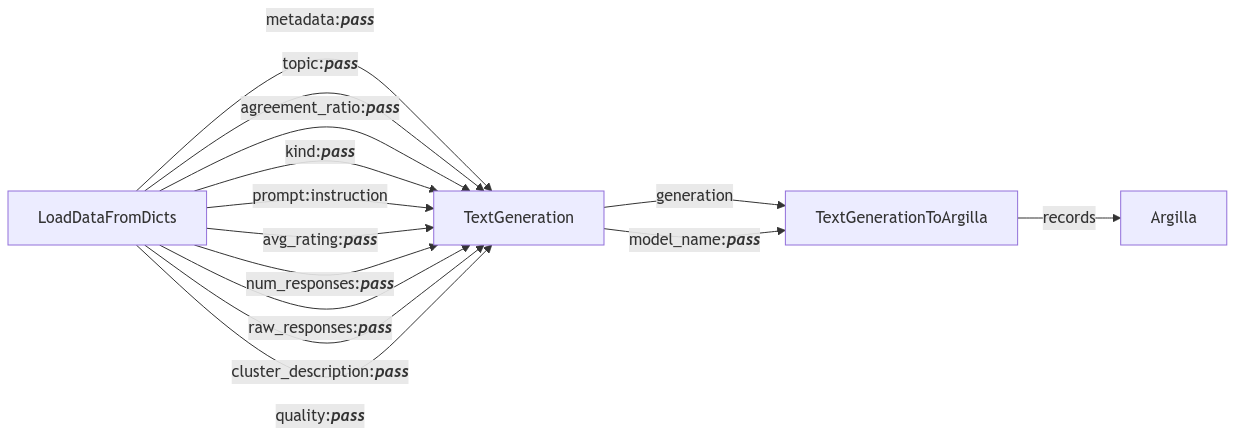

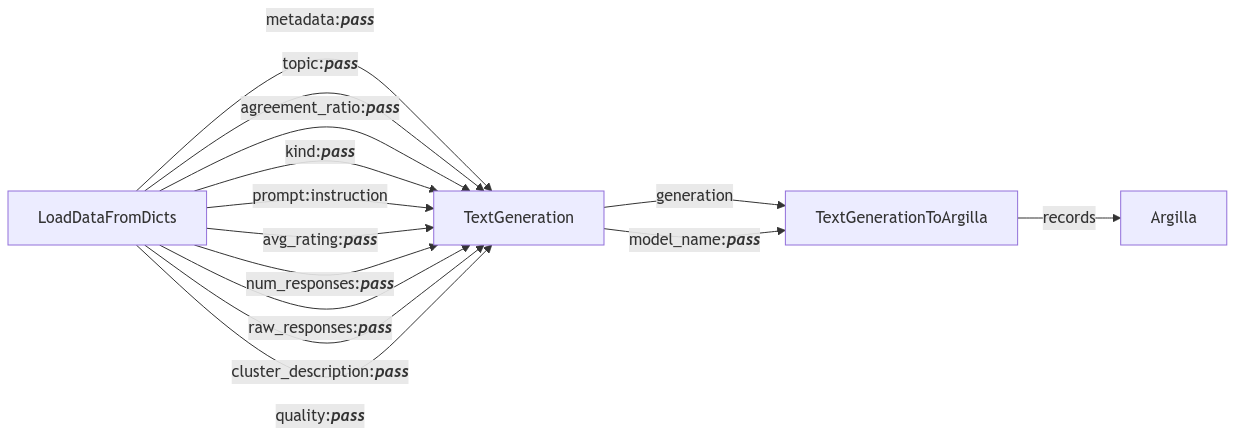

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:2                                                                              │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │          added_user = User(id=UUID('89e2e43a-fa98-4a35-85c9-0356afc49e1a')                   │ │
│ │                       inserted_at=datetime.datetime(2024, 10, 20, 19, 15, 56, 157167)        │ │
│ │                       updated_at=datetime.datetime(2024, 10, 20, 19, 15, 56, 157167)         │ │
│ │                       username='admin' role=<Role.admin: 'admin'> first_name='admin'         │ │
│ │                       last_name=None password=None)                                          │ │
│ │             api_key = 'KigjdkmMPkuMgLBgH-Z_qBTA8lMkTQ7ozLYikVk8wZ11Q7QjF5A_kNh_T-N_CV7BTIl8… │ │
│ │             api_url = 'https://bhuvana-ak7-my-argilla.hf.space'                              │ │
│ │      argilla_record = {                                                                      │ │
│ │                       │   'id': '17543c22-a593-4754-aa6c-b9820c2b70e2',                      │ │
│ │                       │   'instruction': 'Design a poster for a summer concert.\nCafe Music  │ │
│ │                       Fest',                                                                 │ │
│ │                       │   'generation': ': "Summer Sounds"\nDraft the poster design for a    │ │
│ │                       coffeehouse music festival featu'+268                                  │ │
│ │                       }                                                                      │ │
│ │     argilla_records = [                                                                      │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': '22f34729-b92e-4046-8617-322ad9f224af',                  │ │
│ │                       │   │   'instruction': "Let's think step by step! Choose the sentence  │ │
│ │                       that goes against common sense.\nOp"+189,                              │ │
│ │                       │   │   'generation': 'Solution: Sentence B. Common sense says that    │ │
│ │                       Lily should turn in her homework on'+32                                │ │
│ │                       │   },                                                                 │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': 'da17f0fa-99b2-4416-8fbe-1327ed06e813',                  │ │
│ │                       │   │   'instruction': 'write an executive summary for a research      │ │
│ │                       grant proposal on the topic of sustain'+210,                           │ │
│ │                       │   │   'generation': '. The proposed study will aim to develop a      │ │
│ │                       model to measure and evaluate the eff'+360                             │ │
│ │                       │   },                                                                 │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': '36654d28-f207-455e-a88e-ad401c3b58ad',                  │ │
│ │                       │   │   'instruction': 'Write a rap about German',                     │ │
│ │                       │   │   'generation': '-made weapons and the importance of their use   │ │
│ │                       in World War II. Incorporate vivid'+365                                │ │
│ │                       │   },                                                                 │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': 'e0eda330-0aad-4e0a-b

In [134]:
user = rg.User.create(
        username="admin",
        password=userdata.get('argilla_api_key'),
        role="admin",
    )
user

User(id=UUID('89e2e43a-fa98-4a35-85c9-0356afc49e1a') inserted_at=datetime.datetime(2024, 10, 20, 19, 15, 56, 157167) updated_at=datetime.datetime(2024, 10, 20, 19, 15, 56, 157167) username='admin' role=<Role.admin: 'admin'> first_name='admin' last_name=None password='12345678')

In [8]:
client.users

username,id,role,updated_at
bhuvana-ak7,26377801-6c5a-4267-8449-5f91ed58c7d3,owner,2024-10-20T19:34:05.619651


In [141]:
workspace = client.workspaces('argilla')

for user in workspace.users:
    user.role = 'admin'
    print(user.role)

Role.admin


In [143]:
user = client.users('bhuvana-ak7')
workspace = client.workspaces('argilla')

#added_user = user.add_to_workspace(workspace)

In [130]:
user

User(id=UUID('89e2e43a-fa98-4a35-85c9-0356afc49e1a') inserted_at=datetime.datetime(2024, 10, 20, 19, 15, 56, 157167) updated_at=datetime.datetime(2024, 10, 20, 19, 15, 56, 157167) username='admin' role=<Role.admin: 'admin'> first_name='admin' last_name=None password=None)

In [144]:
import argilla as rg

# Initialize Argilla client

# Initialize the Argilla client

from uuid import uuid4
client = rg.Argilla(
    api_url=userdata.get('argilla_api_url'),
    api_key=userdata.get('argilla_api_key')
)

workspace = "argilla"
dataset_name = f"DIBT_sample_prompts_{uuid4()}"

# Create a new Dataset
dataset = rg.Dataset(
    name=dataset_name,
    workspace=workspace,
    client=client
)

# Configure the dataset settings
dataset.settings.fields = [
    rg.TextField(name="id", required=False),
    rg.TextField(name="instruction"),
    rg.TextField(name="generation",required=False),
]

dataset.settings.questions = [
    rg.LabelQuestion(
        name="quality",
        labels=["👎", "👍"],
        title="Quality of the generated text",
    )
]

# Create the dataset on the server
dataset.create()

print(f"New dataset '{dataset_name}' created in workspace '{workspace}'")

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/handlers.py", line 1475, in emit
    self.enqueue(self.prepare(record))
  File "/usr/lib/python3.10/logging/handlers.py", line 1436, in enqueue
    self.queue.put_nowait(record)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0x7914f88c5030> is closed
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/

New dataset 'DIBT_sample_prompts_1a33dca4-00da-42b3-a4a0-c8014619f95e' created in workspace 'argilla'


In [14]:
from huggingface_hub import snapshot_download
from transformers import AutoTokenizer, AutoModelForCausalLM
import os
from pathlib import Path

# Set the model name
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# Set the directory where you want to save the model
local_model_path = "/content/tinyllama-1.1b-chat"

# Download the model
print(f"Downloading {model_name} to {local_model_path}...")
snapshot_download(repo_id=model_name, local_dir=local_model_path)

# Load the tokenizer and model to verify the download
print("Loading the model to verify the download...")
tokenizer = AutoTokenizer.from_pretrained(local_model_path)
model = AutoModelForCausalLM.from_pretrained(local_model_path)

print(f"Model {model_name} has been successfully downloaded and loaded.")

# Print the size of the downloaded model
total_size = sum(f.stat().st_size for f in Path(local_model_path).glob('**/*') if f.is_file())
print(f"Total size of the downloaded model: {total_size / 1e9:.2f} GB")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

eval_results.json:   0%|          | 0.00/566 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

Loading the model to verify the download...
Model TinyLlama/TinyLlama-1.1B-Chat-v1.0 has been successfully downloaded and loaded.
Total size of the downloaded model: 2.20 GB


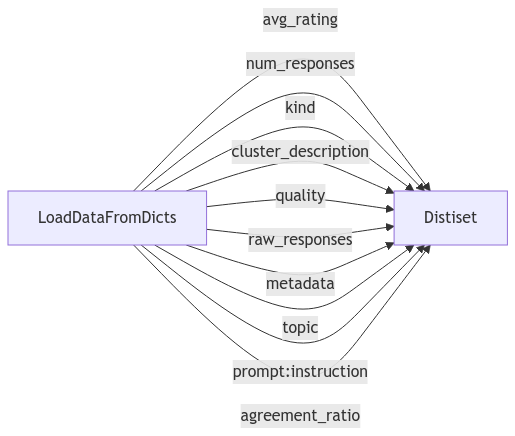

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │              client = <argilla.client.Argilla object at 0x7d74782ce1d0>                      │ │
│ │        column_names = [                                                                      │ │
│ │                       │   'prompt',                                                          │ │
│ │                       │   'quality',                                                         │ │
│ │                       │   'metadata',                                                        │ │
│ │                       │   'avg_rating',                                                      │ │
│ │                       │   'num_responses',                                                   │ │
│ │                       │   'agreement_ratio',                                                 │ │
│ │                       │   'raw_responses',                                                   │ │
│ │                       │   'kind',                                                            │ │
│ │                       │   'cluster_description',                                             │ │
│ │                       │   'topic'                                                            │ │
│ │                       ]                                                                      │ │
│ │             dataset = DatasetDict({                                                          │ │
│ │                       │   train: Dataset({                                                   │ │
│ │                       │   │   features: ['prompt', 'quality', 'metadata', 'avg_rating',      │ │
│ │                       'num_responses', 'agreement_ratio', 'raw_responses', 'kind',           │ │
│ │                       'cluster_description', 'topic'],                                       │ │
│ │                       │   │   num_rows: 10331                                                │ │
│ │                       │   })                                                                 │ │
│ │                       })                                                                     │ │
│ │        dataset_name = 'DIBT_sample_prompts_1a33dca4-00da-42b3-a4a0-c8014619f95e'             │ │
│ │                exit = <IPython.core.autocall.ZMQExitAutocall object at 0x7d7481275240>       │ │
│ │    filtered_dataset = Dataset({                                                              │ │
│ │                       │   features: ['prompt', 'quality', 'metadata', 'avg_rating',          │ │
│ │                       'num_responses', 'agreement_ratio', 'raw_responses', 'kind',           │ │
│ │                       'cluster_description', 'topic'],                                       │ │
│ │                       │   num_rows: 1832                                                     │ │
│ │                       })                                                                     │ │
│ │ filtered_dataset_10 = Dataset({                                                              │ │
│ │                       │   features: ['prompt', 'quality', 'metadata', 'avg_rating',          │ │
│ │                       'num_responses', 'agreement_ratio', 'raw_responses', 'kind',           │ │
│ │                       'cluster_description', 'topic'],                                       │ │
│ │                       │   num_rows: 1                                                        │ │
│ │                       })                                                                     │ │
│ │         get_ipython = <bound method InteractiveShell.get_ipython of                          │ │
│ │                       <google.colab._shell.Shell object a

In [17]:
# Filter the dataset to pick the highest quality responses
filtered_dataset = load_dataset("DIBT/10k_prompts_ranked", split="train").filter(
    lambda r: float(r["avg_rating"]) >= 4 and int(r["num_responses"]) >= 2
)

In [18]:
# View the features of your filtered dataset
filtered_dataset.features

{'prompt': Value(dtype='string', id='field'),
 'quality': [{'user_id': Value(dtype='string', id='question'),
   'value': Value(dtype='string', id='suggestion'),
   'status': Value(dtype='string', id='question')}],
 'metadata': Value(dtype='string', id='metadata'),
 'avg_rating': Value(dtype='float64', id=None),
 'num_responses': Value(dtype='int64', id=None),
 'agreement_ratio': Value(dtype='float64', id=None),
 'raw_responses': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'kind': Value(dtype='string', id=None),
 'cluster_description': Value(dtype='string', id=None),
 'topic': Value(dtype='string', id=None)}

## Option A: Use local LLMs to create your pipelines

In [39]:
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import (
    LoadDataFromDicts,
    TextGenerationToArgilla,
)
from distilabel.steps.tasks import TextGeneration
from datasets import load_dataset

# Subset your filtered dataset because of compute requirements. However, you can skip this step if you are not using a compute-constrained environment
filtered_dataset_10 = filtered_dataset.select(range(5))
filtered_dataset_10

Dataset({
    features: ['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic'],
    num_rows: 5
})

In [20]:
# filtered_dataset_10[0]
dataset_name="DIBT_sample_prompts_1a33dca4-00da-42b3-a4a0-c8014619f95e"
workspace="argilla"

In [81]:
# Create the pipeline
with Pipeline(
    name="prefs-with-tinyllama",
    description="Pipeline for building preference datasets using TinyLlama",
) as pipeline:
    load_dataset = LoadDataFromDicts(
        name="load_dataset",
        data=filtered_dataset_10,
        output_mappings={"prompt": "instruction"},
    )
    text_generation = TextGeneration(
        name="text_generation",
        llm=TransformersLLM(
            model=local_model_path,
            device_map="auto",  # This will use available GPU(s) efficiently
            torch_dtype="auto",  # This will use the appropriate dtype for the model
            trust_remote_code=True,  # This may be necessary for some models
            model_kwargs={
                "low_cpu_mem_usage": True,  # This can help with memory issues
            },
        ),
    )
    to_argilla = TextGenerationToArgilla(
          name="text_generation_to_argilla",
          dataset_name="new_dataset",
          dataset_workspace=workspace,
          api_key=userdata.get('argilla_api_key'),
          api_url=userdata.get('argilla_api_url'),
      )
    load_dataset.load()
    text_generation.load()
    to_argilla.load()
    result = next(load_dataset.process())
    responses = result[0]
    print(responses)
    for i in range(len(responses)):
      instruction = responses[i]["prompt"]
      result = next(text_generation.process([
              {
                  "instruction": instruction,
              },
          ] ))
      generation = result[0]['generation']
      print(f"instruction : {instruction}, \n generation: {generation}")
      generation =generation if generation else "empty generation"
      result = next(
              to_argilla.process(
                  [
                      {
                          "id": str(uuid4()),
                          "instruction": instruction,
                          "generation": generation,
                      }
                  ],
              )
      )
      print(f"\n final result {result}")


    # to_argilla = TextGenerationToArgilla(
    #     name="text_generation_to_argilla",
    #     dataset_name=dataset_name,
    #     dataset_workspace=workspace,
    # )

    # load_dataset >> text_generation >> to_argilla



[10/24/24 04:03:29] INFO     ['accelerate.utils.modeling'] We will use 90% of the memory on device ]8;id=962332;file:///usr/local/lib/python3.10/dist-packages/accelerate/utils/modeling.py\modeling.py]8;;\:]8;id=863791;file:///usr/local/lib/python3.10/dist-packages/accelerate/utils/modeling.py#1086\1086]8;;\
                             0 for storing the model, and 10% for the buffer to avoid OOM. You can                 
                             set `max_memory` in to a higher value to use more memory (at your own                 
                             risk).                                                                                

[10/24/24 04:03:31] INFO     ['root'] Argilla: Logged in as bhuvana-ak7 with the role owner          ]8;id=378225;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py\_client.py]8;;\:]8;id=674227;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py#147\147]8;;\

[{'prompt': 'Provide step-by-step instructions on how to make a safe and effective homemade all-purpose cleaner from common household ingredients. The guide should include measurements, tips for storing the cleaner, and additional variations or scents that can be added. Additionally, the guide should be written in clear and concise language, with helpful visuals or photographs to aid in the process.', 'quality': [{'user_id': 'd23b12c2-b601-490e-b5b3-2040eb393a00', 'value': '4', 'status': 'submitted'}, {'user_id': 'e2bdd868-f28e-46fc-9254-a6ec1e291889', 'value': '4', 'status': 'submitted'}], 'metadata': '{"source": "ultrachat", "kind": "synthetic", "evolved_from": null}', 'avg_rating': 5.0, 'num_responses': 2, 'agreement_ratio': 1.0, 'raw_responses': [5, 5], 'kind': 'synthetic', 'cluster_description': 'Sustainable Packaging & Skin Care Products', 'topic': 'Environmental Issues'}, {'prompt': 'Gunnar and Emma, who are known for their love of collecting unique board games, find themselves 

DatasetRecords: The provided batch size 256 was normalized. Using value 1.

Sending records...: 100%|██████████| 1/1 [00:00<00:00,  8.17batch/s]



 final result [{'id': '141f29eb-a686-4baf-8449-d48836fdcabd', 'instruction': 'Provide step-by-step instructions on how to make a safe and effective homemade all-purpose cleaner from common household ingredients. The guide should include measurements, tips for storing the cleaner, and additional variations or scents that can be added. Additionally, the guide should be written in clear and concise language, with helpful visuals or photographs to aid in the process.', 'generation': 'empty generation'}]
instruction : Gunnar and Emma, who are known for their love of collecting unique board games, find themselves in a challenging predicament caused by a severe storm that has led to a power outage. Determined to keep themselves entertained, they decide to create a new game using two dice each. The objective of the game is for the player with the higher sum of their respective dice to emerge victorious. In the event of a tie, the game will end in a draw. Your task is to thoroughly analyze the

DatasetRecords: The provided batch size 256 was normalized. Using value 1.

Sending records...: 100%|██████████| 1/1 [00:00<00:00,  8.28batch/s]


 final result [{'id': '05d9b498-6481-4901-8392-fb86f6acb7db', 'instruction': 'Gunnar and Emma, who are known for their love of collecting unique board games, find themselves in a challenging predicament caused by a severe storm that has led to a power outage. Determined to keep themselves entertained, they decide to create a new game using two dice each. The objective of the game is for the player with the higher sum of their respective dice to emerge victorious. In the event of a tie, the game will end in a draw. Your task is to thoroughly analyze the given descriptions of the dice and determine which player, Gunnar or Emma, has a higher probability of winning.\n\nEach die possesses its own unique attributes, with the numbers on its sides ranging from the minimum value \'a\' to the maximum value \'b\', inclusively. The input consists of four integers, represented as a1, b1, a2, and b2, which describe the dice owned by Gunnar. The first die has numbers ranging from \'a1\' to \'b1\', w

instruction : Let's think step by step! Choose the sentence that goes against common sense.
Options:
- Sentence A: "Lily turns in her homework in time every day so she is disliked by teachers"
- Sentence B: "Lily turns in her homework in time every day so she is liked by teachers"

, 
 generation: Based on the given text, which sentence would be considered contrary to common sense?

Option A: Sentence A
Based on the given text, which sentence would be considered contrary to common sense?

Answer: Option A


DatasetRecords: The provided batch size 256 was normalized. Using value 1.

Sending records...: 100%|██████████| 1/1 [00:00<00:00,  7.48batch/s]


 final result [{'id': '7bcf79d4-f668-4469-99ab-26377cbb6d3e', 'instruction': 'Let\'s think step by step! Choose the sentence that goes against common sense.\nOptions:\n- Sentence A: "Lily turns in her homework in time every day so she is disliked by teachers"\n- Sentence B: "Lily turns in her homework in time every day so she is liked by teachers"\n\n', 'generation': 'Based on the given text, which sentence would be considered contrary to common sense?\n\nOption A: Sentence A\nBased on the given text, which sentence would be considered contrary to common sense?\n\nAnswer: Option A'}]


instruction : write an executive summary for a research grant proposal on the topic of sustainability marketing, focusing on the role ot the Marketing Manager, for a 12-month project with 3 part-time researchers conducting etnographic research and interviewing marketing managers of Fortune 500 companies, 
 generation: . The summary should include a clear statement of the problem to be addressed, the proposed solution, the expected outcomes, the timeline, budget, and any relevant qualifications or experience of the Marketing Manager.


DatasetRecords: The provided batch size 256 was normalized. Using value 1.

Sending records...: 100%|██████████| 1/1 [00:00<00:00,  8.08batch/s]


 final result [{'id': 'a140805d-f60f-4de6-aa3e-e56a2990e1a6', 'instruction': 'write an executive summary for a research grant proposal on the topic of sustainability marketing, focusing on the role ot the Marketing Manager, for a 12-month project with 3 part-time researchers conducting etnographic research and interviewing marketing managers of Fortune 500 companies', 'generation': '. The summary should include a clear statement of the problem to be addressed, the proposed solution, the expected outcomes, the timeline, budget, and any relevant qualifications or experience of the Marketing Manager.'}]


instruction : Write a rap about German, 
 generation:  beer
- "German Beer, it's the best in the world"
- "It's crisp and refreshing, with a hint of hops"
- "It's got a malty sweetness, like a warm blanket on a cold night"
- "It's got a bitterness that makes you feel alive"
- "It's the perfect drink for a summer day, or a winter night"
- "German beer, it's the one thing that never fails to make me happy"


DatasetRecords: The provided batch size 256 was normalized. Using value 1.

Sending records...: 100%|██████████| 1/1 [00:00<00:00,  7.79batch/s]


 final result [{'id': 'f76d4360-e54d-41ae-ac97-4a7407084c3e', 'instruction': 'Write a rap about German', 'generation': ' beer\n- "German Beer, it\'s the best in the world"\n- "It\'s crisp and refreshing, with a hint of hops"\n- "It\'s got a malty sweetness, like a warm blanket on a cold night"\n- "It\'s got a bitterness that makes you feel alive"\n- "It\'s the perfect drink for a summer day, or a winter night"\n- "German beer, it\'s the one thing that never fails to make me happy"'}]


In [22]:
api_url = userdata.get('argilla_api_url')  # or os.environ if you are not using Google Colab
api_key = userdata.get("argilla_api_key")

In [75]:
from uuid import uuid4
# Run the pipeline
distiset = pipeline.run(
    use_cache=False,
    parameters={
        "load_dataset": {
            "batch_size": 5,
        },
        "text_generation": {
            "llm": {
                "generation_kwargs": {
                    "max_new_tokens": 512,
                    "temperature": 0.7,
                    "do_sample": True,
                    "top_p": 0.95,
                    "top_k": 50,
                }
            },
            # "output_mappings": {
            #     "prompt": "instruction",
            #     "generation": "generation",
            # },

        },
        "text_generation_to_argilla": {

            "api_url": api_url,
            "api_key": api_key,
            "dataset_name": "new_dataset_1",
            "dataset_workspace": workspace,
        },
    }
)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │             api_key = 'Ckw8pYRcfb1cBfjnJg2iTWBH6E7phyzZJJF0xkG3ExuaKEjz3LinEBLhWTIIgenQR9gW… │ │
│ │             api_url = 'https://bhuvana-ak7-my-argilla.hf.space'                              │ │
│ │              client = <argilla.client.Argilla object at 0x7d74782ce1d0>                      │ │
│ │        column_names = [                                                                      │ │
│ │                       │   'prompt',                                                          │ │
│ │                       │   'quality',                                                         │ │
│ │                       │   'metadata',                                                        │ │
│ │                       │   'avg_rating',                                                      │ │
│ │                       │   'num_responses',                                                   │ │
│ │                       │   'agreement_ratio',                                                 │ │
│ │                       │   'raw_responses',                                                   │ │
│ │                       │   'kind',                                                            │ │
│ │                       │   'cluster_description',                                             │ │
│ │                       │   'topic'                                                            │ │
│ │                       ]                                                                      │ │
│ │             dataset = DatasetDict({                                                          │ │
│ │                       │   train: Dataset({                                                   │ │
│ │                       │   │   features: ['prompt', 'quality', 'metadata', 'avg_rating',      │ │
│ │                       'num_responses', 'agreement_ratio', 'raw_responses', 'kind',           │ │
│ │                       'cluster_description', 'topic'],                                       │ │
│ │                       │   │   num_rows: 10331                                                │ │
│ │                       │   })                                                                 │ │
│ │                       })                                                                     │ │
│ │        dataset_name = 'DIBT_sample_prompts_1a33dca4-00da-42b3-a4a0-c8014619f95e'             │ │
│ │            distiset = Distiset({                                                             │ │
│ │                       │   default: DatasetDict({                                             │ │
│ │                       │   │   train: Dataset({                                               │ │
│ │                       │   │   │   features: ['instruction', 'quality', 'metadata',           │ │
│ │                       'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses',     │ │
│ │                       'kind', 'cluster_description', 'topic', 'generation',                  │ │
│ │                       'distilabel_metadata', 'model_name'],                                  │ │
│ │                       │   │   │   num_rows: 1                                                │ │
│ │                       │   │   })                                                             │ │
│ │                       │   })                                                                 │ │
│ │                       })                                                                     │ │
│ │                exit = <IPython.core.autocall.ZMQExitAutocall object at 0x7d7481275240>       │ │
│ │    filtered_dataset = Dataset({                          

In [109]:
print(userdata.get('argilla_api_url'))

https://bhuvana-ak7-my-argilla.hf.space


In [30]:
pd_df = distiset["default"]["train"].to_pandas()

In [31]:
pd_df

,instruction,quality,metadata,avg_rating,num_responses,agreement_ratio,raw_responses,kind,cluster_description,topic,generation,distilabel_metadata,model_name
0,Provide step-by-step instructions on how to ma...,"[{'status': 'submitted', 'user_id': 'd23b12c2-...","{""source"": ""ultrachat"", ""kind"": ""synthetic"", ""...",5.0,2,1.0,"[5, 5]",synthetic,Sustainable Packaging & Skin Care Products,Environmental Issues,,{'raw_input_text_generation': [{'content': 'Pr...,/content/tinyllama-1.1b-chat


In [113]:
import argilla as rg
from uuid import uuid4

argilla_records = []
for _, row in pd_df.iterrows():
  # print(row["generation"])
  if row["generation"]:
    # Convert to Argilla format (list of dictionaries)
    argilla_record = {
          "id": str(uuid4()),
          "instruction": row["instruction"],  # Assuming your Argilla schema has a "text" field
          "generation": row["generation"]   # Assuming your Argilla schema has a "label" field
      }
    argilla_records.append(argilla_record)
  else:
    print("No generation")



print(len(argilla_records))


No generation
No generation
No generation
No generation
6


In [114]:
print(client)

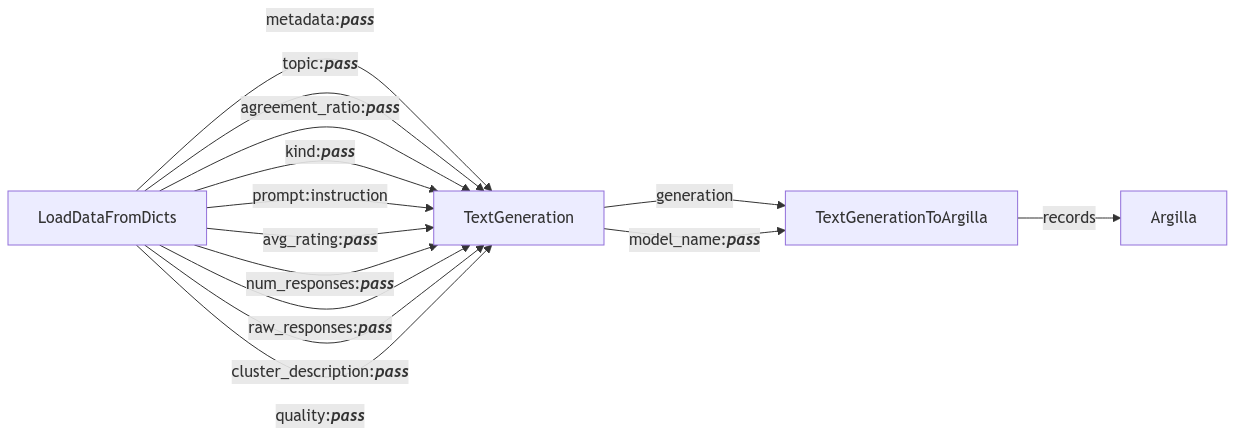

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │             api_key = '0dA4btTens6_UX7olj7Mm0kiQ3V5fkpDRQ8DFpjpZpd7_i9Gke9_T5l-x0pDQvBuDZ1s… │ │
│ │             api_url = 'https://bhuvana-ak7-my-argilla.hf.space'                              │ │
│ │      argilla_record = {                                                                      │ │
│ │                       │   'id': '07815b11-0c20-4a5c-8dc5-a11bb271c423',                      │ │
│ │                       │   'instruction': 'Design a poster for a summer concert.\nCafe Music  │ │
│ │                       Fest',                                                                 │ │
│ │                       │   'generation': '\nTitle: Cafe Music Fest\nDesign a poster for the   │ │
│ │                       Cafe Music Fest, a music festiva'+484                                  │ │
│ │                       }                                                                      │ │
│ │     argilla_records = [                                                                      │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': '9157648d-ec63-4a35-8d3f-2e813f200e46',                  │ │
│ │                       │   │   'instruction': 'Gunnar and Emma, who are known for their love  │ │
│ │                       of collecting unique board games, '+1219,                              │ │
│ │                       │   │   'generation': ' Your solution should be written in an          │ │
│ │                       organized and readable manner using appro'+48                          │ │
│ │                       │   },                                                                 │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': '4ffdeba8-d078-445e-9f16-be0b9af7b764',                  │ │
│ │                       │   │   'instruction': "Let's think step by step! Choose the sentence  │ │
│ │                       that goes against common sense.\nOp"+189,                              │ │
│ │                       │   │   'generation': 'Option A is true, while option B is false       │ │
│ │                       because it contradicts common sense. S'+27                             │ │
│ │                       │   },                                                                 │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': '79e13abf-c20a-449a-a00f-fca58bc0c61d',                  │ │
│ │                       │   │   'instruction': 'write an executive summary for a research      │ │
│ │                       grant proposal on the topic of sustain'+210,                           │ │
│ │                       │   │   'generation': ' in the US. The proposal should also include    │ │
│ │                       the expected outcomes of the projec'+287                               │ │
│ │                       │   },                                                                 │ │
│ │                       │   {                                                                  │ │
│ │                       │   │   'id': 'acff95a5-d995-4811-8f86-97151553e8c9',                  │ │
│ │                       │   │   'instruction': 'Write a rap about German',                     │ │
│ │                       │   │   'generation': ' engineering\n- "Germans build tanks and        │ │
│ │                       trains, bridges and machines / We got yo'+1152                         │ │
│ │                       │   },                             

In [77]:
rg.log(argilla_records)

## Option B: Use OpenAI LLM to create your pipeline

In [ ]:
from distilabel.llms import OpenAILLM
import os

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
filtered_dataset_10.features
#dataset_name

{'prompt': Value(dtype='string', id='field'),
 'quality': [{'user_id': Value(dtype='string', id='question'),
   'value': Value(dtype='string', id='suggestion'),
   'status': Value(dtype='string', id='question')}],
 'metadata': Value(dtype='string', id='metadata'),
 'avg_rating': Value(dtype='float64', id=None),
 'num_responses': Value(dtype='int64', id=None),
 'agreement_ratio': Value(dtype='float64', id=None),
 'raw_responses': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'kind': Value(dtype='string', id=None),
 'cluster_description': Value(dtype='string', id=None),
 'topic': Value(dtype='string', id=None)}

In [ ]:
# Create the pipeline
with Pipeline(
    name="prefs-with-openai",
    description="Pipeline for building preference datasets using OpenAI",
) as pipeline:
    load_dataset = LoadDataFromDicts(
        name="load_dataset",
        data=filtered_dataset_10,
        output_mappings={"prompt": "instruction"},
    )
    text_generation = TextGeneration(
        name="text_generation",
        llm=OpenAILLM(model="gpt-4")
    )

    to_argilla = TextGenerationToArgilla(
        name="text_generation_to_argilla",
        dataset_name=dataset_name,
        dataset_workspace=workspace,
    )
    load_dataset >> text_generation >> to_argilla

# Run the pipeline
distiset = pipeline.run(
    parameters={
        "load_dataset": {
            "batch_size": 16,
        },
        "text_generation": {
            "llm": {
                "generation_kwargs": {
                    "temperature": 0.7,
                }
            }
        },
        "text_generation_to_argilla": {
            "api_url": userdata.get('argilla_api_url'),
            "api_key": userdata.get('argilla_api_key'),
            "dataset_name": dataset_name,
            "dataset_workspace": workspace,
        },
    }
)

[10/20/24 16:41:51] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to                ]8;id=995473;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=370283;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#866\866]8;;\
                             '/root/.cache/distilabel/pipelines/prefs-with-openai/1a440b4593dcf2dafbc5a            
                             3a48b5ca698109ed0e1/executions/68b81c16f5090128c911e0a36c459bcae24f4a9a/da            
                             ta/steps_outputs'                                                                     

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in     ]8;id=883457;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=19541;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#889\889]8;;\
                             stages:                                                                               
                              * Stage 0:                                                                           
                                - 'load_dataset' (results cached, won't be loaded and executed)                    
                                - 'text_generation' (results cached, won't be loaded and executed)                 
                                - 'text_generation_to_argilla'                                                     

[10/20/24 16:41:52] INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=516216;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=944834;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1183\1183]8;;\
                             load...                                                                               

                    INFO     ['root'] Argilla: Logged in as bhuvana-ak7 with the role owner          ]8;id=561798;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py\_client.py]8;;\:]8;id=486596;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py#147\147]8;;\

[10/20/24 16:41:54] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 1/1                 ]8;id=261272;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=942813;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'text_generation_to_argilla' replicas: 1/1                                         

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=70017;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=826157;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1220\1220]8;;\

                    INFO     ['distilabel.step.text_generation_to_argilla'] 📦 Processing batch ]8;id=339322;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=969569;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             0 in 'text_generation_to_argilla' (replica ID: 0)                                     

[10/20/24 16:56:30] INFO     ['distilabel.pipeline'] 🛑 Stopping pipeline. Waiting for steps to finish ]8;id=500504;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/local.py\local.py]8;;\:]8;id=62644;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/local.py#419\419]8;;\
                             processing batches...                                                                 

[10/20/24 16:56:31] WARNING  ['distilabel.pipeline'] 🛑 Press again to force the pipeline to stop.     ]8;id=639607;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/local.py\local.py]8;;\:]8;id=159060;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/local.py#392\392]8;;\

## Install Eleuther Evaluation Harness

In [ ]:
%%bash
git clone https://github.com/EleutherAI/lm-evaluation-harness
cd lm-evaluation-harness
pip install -e .

## Evaluate the LLM using Eleuther Evaluation Harness

In [ ]:
%%bash
lm_eval --model hf \
    --model_args pretrained=EleutherAI/pythia-160m,revision=step100000,dtype="float" \
    --tasks hellaswag \
    --device cuda \
    --batch_size auto:4 \
    --output_path hellaswag_test